# Lab 10, Supervised Learning, part 2 
 

In class Tuesday, you had the opportunity to learn about additional classification models and methods to assist with Model Evaluation: 

* Exposure to the [Scikit-learn toolbox](https://scikit-learn.org/stable/index.html)
* Decision Trees
* Learning Curves 
* Support Vector Machines 
* Model Evaluation

In the previous lab, we looked at KNN, performance metrics, and confusion matrix. 

In this lab session, we will look at the following: 

* Scikit learning methods and useful functions
* Decision Trees
* Support Vector Machines 

Useful Links: http://scikit-learn.org/stable/index.html

## Autograder Setup

Code establishing a condition so that you don't have to worry about commenting out lines of code before submitting.

In [ ]:
import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False
GS

False

In [ ]:
if GS==False:
    print("Installing otter:")
    !pip install otter-grader
    !wget https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab10/lab10.files.zip
    !unzip lab10.files.zip

Installing otter:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 11.6 MB/s 
     |████████████████████████████████| 98 kB 3.1 MB/s 
     |████████████████████████████████| 297 kB 43.5 MB/s 
     |████████████████████████████████| 1.6 MB 33.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 46 kB 1.1 MB/s 
--2022-11-09 02:47:14--  https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab10/lab10.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1402 (1.4K) [application/zip]
Saving to: ‘lab10.files.zip’

lab10.files.zip     100%[===================>]   1.37K  --.-KB/s    in 0s      

2022-11-09 02:47:15 (130 MB/s) - ‘lab10.files.zip’ saved [1402/1402]

Archive:  lab10.files.zip
   creating: tests/

## Lab Setup

Perform the following steps:
* Import library numpy, matplotlib, 
* Import from scikit-learn the datasets, neighbors, metrics, model selection libraries
* Load cancer dataset using sklearn datasets and assign to "cancer"
* Look into the various attributes of the cancer dataset: attribute names, target classes, size of data 

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# import math and random modules
import math, random

import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm


import otter
grader = otter.Notebook()


cancer = load_breast_cancer()

In [ ]:
print(cancer.data.shape)
print(cancer.target_names)
# print(cancer.DESCR)
print('cancer dataset features:', cancer.feature_names)

(569, 30)
['malignant' 'benign']
cancer dataset features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Helper Methods to Visualize Classification Results

Here are two methods to help visualize the decision boundary of classification models. 

In [ ]:
# """ Decision boundary plotting function from Hands-On Machine Learning with Scikit-Learn
# and TensorFlow """

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
    
# Function adapted from source: 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X
               [:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Review KNN and model fitting



<!-- BEGIN QUESTION -->

##  Ex. 1A. Visualize Performance vs. Complexity 

Create and explore a visualization for when number of neighbors in KNN is changed from 1 to 30

Use the following procedure:

* Split the data into training (70%) and testing (30%)
    * To maintain consistency among students, let's use random state of 65, make sure to use the `stratify` parameter
* Use a for loop to explore the number of neighbors parameters 
    * Inside the loop, you will have to build the knn, train the model and compute the accuracy on both the train and test sets 
    * The training and testing accuracy for each neighbor (iteration) can be stored
* Plot the training and testing accuracy versus the number of neighbors 

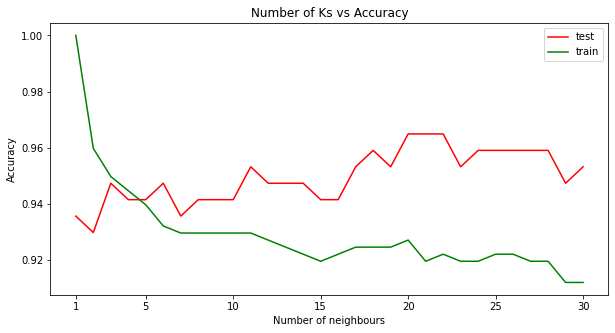

30
30


In [ ]:
train_acc = []
test_acc = []

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=65, stratify=cancer.target)

neighbors_values = np.arange(1, 31)

for k in neighbors_values:

    # specify the knn model 
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model 
    clf.fit(X_train, y_train)
    
    # make predictions with the model 
    yhat_test = clf.predict(X_test)
    yhat_train = clf.predict(X_train)
    # evaluate predictions 
    train_acc.append(accuracy_score(y_train, yhat_train))
    test_acc.append(accuracy_score(y_test, yhat_test))    

# Plot training and testing accuracy versus the number of neighbors
fig = plt.figure(figsize=(10, 5)) 
# Plotting both the curves simultaneously
plt.plot(neighbors_values, test_acc, color='r', label='test')
plt.plot(neighbors_values, train_acc, color='g', label='train')  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.title("Number of Ks vs Accuracy")  
# Adding legend
plt.legend()
# specify x-axis locations
x_ticks = [1, 5, 10, 15, 20, 25, 30]
# specify x-axis labels
x_labels = [1, 5, 10, 15, 20, 25, 30] 
# add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
# To load the display window
plt.show()
print(len(train_acc))
print(len(test_acc))

In [ ]:
grader.check("q1a")

q1a results: All test cases passed!

In [ ]:
train_acc = []
test_acc = []

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=65, stratify=cancer.target)

neighbors_values = np.arange(1, 31)

for k in neighbors_values:

    # specify the knn model 
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model 
    clf.fit(X_train, y_train)

    # evaluate predictions
    train_acc.append(clf.score(X_test, y_test))
    test_acc.append(clf.score(X_train, y_train))    

    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Ex 1B.  `score` 

Look at the `score` function for KNN:  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Describe how you can simplify your code above by making use of the `score` function. 

**Ex 1B - Answer**

The `score` function ...

Therefore the lines: 
```
```   
    # make predictions with the model 
    yhat_test = clf.predict(X_test)
    yhat_train = clf.predict(X_train)
    # evaluate predictions 
    train_acc.append(accuracy_score(y_train, yhat_train))
    test_acc.append(accuracy_score(y_test, yhat_test))    
```
``` 
can be condensed to: 
```
```
    # evaluate predictions
    train_acc.append(clf.score(X_test, y_test))
    test_acc.append(clf.score(X_train, y_train))
```
```

<!-- END QUESTION -->

# Support Vector Machines 

Some of the different kernels that can be accessed by Scikit learn are listed below. 
* Linear 
* Gaussian 
* Exponential
* Polynomial 
* hybrid
* Sigmoidal

Read the below reference for accessing kernels in scikit learn
http://scikit-learn.org/stable/modules/svm.html#svm-kernels

We will use Linear, Gaussian and polynominal for current dataset problem.



Let's consider only the first two features of the breast cancer data set for classification, i.e., mean radius and mean texture.  This allows us to plot the features and labels in a 2D plot. 


In [ ]:
# Take mean radius and mean texture for cancer classification data, 
#  assign to "X" and cancer target names to "y"

X = cancer.data[:, :2]
y = cancer.target

<!-- BEGIN QUESTION -->

### Ex 2A. Linear Kernel 

Train an SVM model with the "linear Kernel" and observe what happens with different value of C-cost. 

Total duration of fitting: 0.019824 s


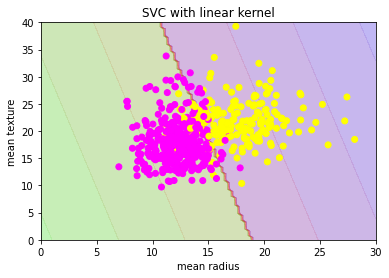

In [ ]:
# Explore training an svm with a linear kernel 
t1 = time.time()
# define the svm model and its hyperparameters: kernel, C
#  plug-in different values for C and observe the differences
#  values for C = [10^-2, 10^-1, 1, 10, 100]
svc = svm.SVC(kernel='linear', C=1)  
svc.fit(X, y) # fit the model 
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# Visualize the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with linear kernel');

Describe what happens when you change the values of C, in terms of: 

* time to train 
* decision surface learned 



**ANSWER**  

*  As value of C increases, the time required to train also increases 
* C does not influence much on the decision boundary of SVM with a linear Kernel

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Ex 2B. RBF Kernel 

Train an SVM model with the "rbf kernel" and observe what happens with different values of C-cost and gamma.  

Total duration of fitting: 0.043248 s


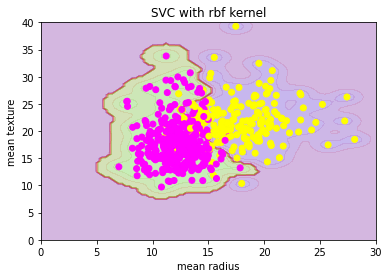

In [ ]:
# Explore training an svm with a rbf kernel  
t1 = time.time()
# define the svm model and its hyperparameters: kernel, C, gamma
#  values for C = [10^-2, 10^-1, 1, 10, 100]
#  values for gamma = [0.01, 0.1, 0.5]
# Then, fit the model
svc = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
svc.fit(X, y) # fit the model     
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# See the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with rbf kernel');

Describe what happens when you change the values of C and gamma. In terms of: 

* time 
* decision surface 


**ANSWER**

* As C and/or gamma increases, the model requires more time to be trained.
* As C and/or gamma becomes larger, the decision boundry becomes more complex and the model becomes more likely to overfit.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Ex 2C. Polynomial Kernel 

- Similar to linear kernel, train the svc for poly kernel and visualize the results.  
- Check what parameters are useful for this [kernel](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).
    * set coef0 = 1
- Consider different degrees starting from 1 to 4
- There might be a case, where the notebook takes almost impossible time to train. In this case, you may need to interrupt the Kernel. 

Total duration of fitting: 0.014668 s


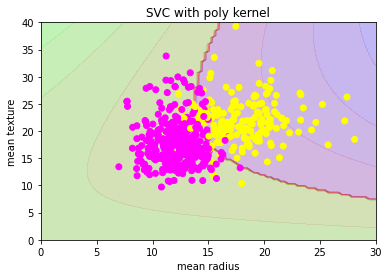

In [ ]:
# Explore training an svm with a polynomial kernel  
t1 = time.time()
# define the svm model and its hyperparameters: C, degree
#  values for C = [10^-2, 10^-1, 1, 10]
#  values for degree = [1, 2, 3, 4]
# Then, fit the model 
svc = svm.SVC(kernel='poly', coef0 = 1, C=1, degree = 2)
svc.fit(X, y) # fit the model    
t2 = time.time()
print("Total duration of fitting: {0:.6f} s".format(t2-t1))


# See the decision surface 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with poly kernel');

Questions and Observations: 

1. What do you observe as you increase the degree of the polynomial (with respect to the plot and time for computation)? 
2. Compare what happens when d=1 or use the linear kernel

#####As the degree of polynomial Kernel is increased, the decision boundry becomes more complex (a very high degree will likely overfit the data set). 
##### A higher degree polynomial Kernel also requires more time to be trained.

<!-- END QUESTION -->

# Decision Trees

<!-- BEGIN QUESTION -->

## Ex3. DT hyperparameters 

- Lets visualize the DT based classifiers and dataset similar to what was done above for the SVMs
- This time use the function `visualize_classifier()`, to visualize the DT classification and scatter plots of data
- The data used to train the model should be the entire cancer data set limited to only two features (column index 22 and 27)

Example: 
`visualize_classifier(classifier, iris.data[:, :2], iris.target)`

Visualize the DT classifier for different values of the hyperparameter *maximum depth*, which specifies the maximum depth of the tree.  

You will look at the visualiztions for maximum depths of 1, 2, 3, and 6.  

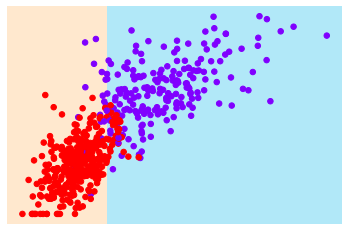

In [ ]:
# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 1 
dt1 = DecisionTreeClassifier(max_depth=1)
visualize_classifier(dt1, cancer.data[:,[22,27]], cancer.target)

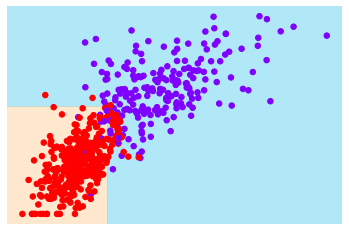

In [ ]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 2 
dt2 = DecisionTreeClassifier(max_depth=2)
visualize_classifier(dt2, cancer.data[:,[22,27]], cancer.target)


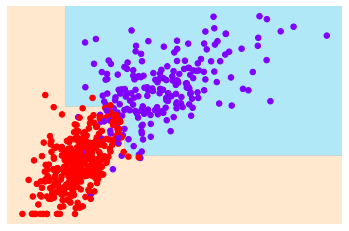

In [ ]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 3 
dt3 = DecisionTreeClassifier(max_depth=3)
visualize_classifier(dt3, cancer.data[:,[22,27]], cancer.target)

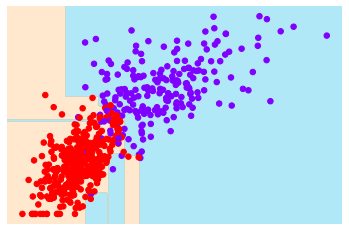

In [ ]:

# select a decision tree classifier with hyperparameter of the 
#   maximum depth of 6 
dt6 = DecisionTreeClassifier(max_depth=6)
visualize_classifier(dt6, cancer.data[:,[22,27]], cancer.target)

<!-- END QUESTION -->

# Model Selection and Evaluation

## Ex4A. DT tune hyperparameters  

Find the best hyperparameters of a Decision Tree classifier using GridSearcCV 
* First, split the data into the train_val and test sets with a 80/20 split of the cancer data set, random_state is 5, and make sure use the stratify option.  
* For the Decision Tree, consider two different hyperparameters: 
    * Maximum depth of the tree:  four different levels = 1, 3, 5, 10
    * Splitting criterion:  'gini' or 'entropy'
* Set the decision tree random state to 5
* Use 5-fold c.v. with accuracy as the metric to evaluate models

* Print out: 
    * the best mean cross-validation accuracy,  
    * the best hyperparameters 
    * the accuracy on the test set of the retrained model with the best hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=5, stratify = cancer.target)

# define the hyperparameter grid 
param_grid = {'max_depth': [1, 3, 5, 10], 'criterion': ('gini', 'entropy')}

# Instantiate GridSearchCV 
grid = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid, cv=5, 
                    return_train_score=True)

# Execute the search (and retrain the final model) 
grid.fit(X_trainval, y_trainval)
# print out best hyperparameters

print(f"best mean cross-validation acc score: {grid.best_score_}")
print(f"best hyperparameters: {grid.best_params_}")

# do a final evaluation of retrained model on the test set
test_acc = grid.score(X_test, y_test) 
print(f"test-set acc score: {test_acc:.3f}")



best mean cross-validation acc score: 0.9428571428571428
best hyperparameters: {'criterion': 'gini', 'max_depth': 10}
test-set acc score: 0.921


In [ ]:
grader.check("q4a")

q4a results: All test cases passed!

## Ex4B. SVM - tune hyperparameters

Find the best hyperparameters for a SVM classifier on the cancer data set using GridSearcCV 
* First, split the data into the train_val and test sets with a 80/20 split of the cancer data set, random_state is 5, and make sure use the stratify option.  
* For the SVM, consider four different hyperparameters: 
    * kernel: polynomial and rbf 
    * degree: (specify degree of the polynomial kernel) 1, 2, 3
    * C: (cost penalty) 0.01, 0.1, 1, 10
* Use 5-fold c.v.
    * Use f1-score to select the best model hyperparameters. 

* Print out: 
    * the best mean cross-validation f1-score,  
    * the best hyperparameters 
    * the f1-score on the test set of the retrained model with the best hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=5, stratify = cancer.target)

# define the hyperparameter grid 
param_grid = {'kernel': ('poly', 'rbf'), 'degree': [1,2,3], 'C': [0.01, 0.1, 1, 10]}

# Instantiate GridSearchCV 
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, 
                    return_train_score=True, scoring='f1')

# Execute the search (and retrain the final model) 
grid.fit(X_trainval, y_trainval)

# print out best hyperparameters
print(f"best mean cross-validation f1 score: {grid.best_score_}")
print(f"best hyperparameters: {grid.best_params_}")

# do a final evaluation of retrained model on the test set 
f1_test = grid.score(X_test, y_test)
print(f"test-set f1 score: {f1_test:.3f}")

best mean cross-validation f1 score: 0.9417938166009414
best hyperparameters: {'C': 10, 'degree': 3, 'kernel': 'poly'}
test-set f1 score: 0.940


In [ ]:
grader.check("q2d")

q2d results: All test cases passed!